# Creatubg Cohorts of Songs

------------------------
## **Context**
------------------------

The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want to see what they might like. To keep the customers engaged, it is crucial for companies to always present the most relevant information. 

Spotify, a Swedish audio streaming and media service provider, has over 456 million active monthly users, including over 195 million paying subscribers as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs.

------------------------
## **Objectives**
------------------------

As a data scientist, your goal is to perform exploratory data analysis and cluster analysis to create cohorts of songs. The objective is to gain a better understanding of the various factors that contribute to creating a cohort of songs. Specifically, you need to:

1. Perform initial data inspection and data cleaning.
2. Conduct exploratory data analysis (EDA) and feature engineering.
3. Perform cluster analysis to identify and define cohorts of songs.

------------------------
## **Data Set Details**
------------------------

The dataset contains data from Spotify's API about all albums for the Rolling Stones listed on Spotify. Each song has unique IDs and several features. The following table lists the name and description of each feature within the dataset:

| Feature         | Description                                                                                   |
|-----------------|-----------------------------------------------------------------------------------------------|
| `name`          | The name of the song.                                                                         |
| `album`         | The name of the album.                                                                        |
| `release_date`  | The release date of the album (day, month, year).                                             |
| `track number`  | The order the song appears on the album.                                                      |
| `id`            | The Spotify ID for the song.                                                                  |
| `uri`           | The Spotify URI for the song.                                                                 |
| `acousticness`  | A confidence measure from 0.0 to 1.0 of whether the track is acoustic.                        |
| `danceability`  | Describes how suitable a track is for dancing, based on a combination of musical elements.    |
| `energy`        | A measure from 0.0 to 1.0 representing a perceptual measure of intensity and activity.        |
| `instrumentalness` | Predicts whether a track contains no vocals.                                              |
| `liveness`      | Detects the presence of an audience in the recording.                                         |
| `loudness`      | The overall loudness of a track in decibels (dB).                                             |
| `speechiness`   | Detects the presence of spoken words in a track.                                              |
| `tempo`         | The overall estimated tempo of a track in beats per minute (BPM).                             |
| `valence`       | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.            |
| `popularity`    | The popularity of the song, from 0 to 100.                                                    |
| `duration_ms`   | The duration of the track in milliseconds.                                                    |

------------------------
## **Analysis Steps to Perform**
------------------------

### Initial Data Inspection and Data Cleaning
- Check whether the data has duplicates, missing values, irrelevant (erroneous) values, or outliers.
- Depending on your findings, clean the data for further processing.

### Exploratory Data Analysis and Feature Engineering
- Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.
- Perform exploratory data analysis to dive deeper into different features of songs and identify patterns.
- Discover how a song's popularity relates to various factors and how this has changed over time.
- Comment on the importance of dimensionality reduction techniques, share your ideas, and explain your observations.

### Cluster Analysis
- Identify the right number of clusters using appropriate methods.
- Use a suitable clustering algorithm to create cohorts of songs.
- Define each cluster based on the features and analyze the characteristics of each cluster.

----------------------------------------
## **Setup: Import Necessary Libraries**
----------------------------------------

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Setting plot aesthetics
sns.set(style='whitegrid')

-----------------------
## **Load the dataset**
-----------------------

In [2]:
# Load the dataset
data = pd.read_csv('rolling_stones_spotify.csv')

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [3]:
data.tail()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.967,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.446,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.835,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.532,27,121680
1609,1609,Walking The Dog,The Rolling Stones,1964-04-16,12,43SkTJJ2xleDaeiE4TIM70,spotify:track:43SkTJJ2xleDaeiE4TIM70,0.3830,0.727,0.934,0.068500,0.0965,-8.373,0.0359,125.275,0.969,35,189186


------------------------------------------------
## **Initial Data Inspection and Data Cleaning**
------------------------------------------------

In [4]:
# Drop the first column
data = data.drop(data.columns[0], axis=1)

data.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [5]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Drop duplicates if any
data = data.drop_duplicates()

Number of duplicate rows: 0


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [8]:
# Display basic statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_number,1610.0,8.613665,6.560220,1.000000,4.000000,7.00000,11.00000,47.000
acousticness,1610.0,0.250475,0.227397,0.000009,0.058350,0.18300,0.40375,0.994
danceability,1610.0,0.468860,0.141775,0.104000,0.362250,0.45800,0.57800,0.887
energy,1610.0,0.792352,0.179886,0.141000,0.674000,0.84850,0.94500,0.999
instrumentalness,1610.0,0.164170,0.276249,0.000000,0.000219,0.01375,0.17900,0.996
liveness,1610.0,0.491730,0.349100,0.021900,0.153000,0.37950,0.89375,0.998
loudness,1610.0,-6.971615,2.994003,-24.408000,-8.982500,-6.52300,-4.60875,-1.014
speechiness,1610.0,0.069512,0.051631,0.023200,0.036500,0.05120,0.08660,0.624
tempo,1610.0,126.082033,29.233483,46.525000,107.390750,124.40450,142.35575,216.304
valence,1610.0,0.582165,0.231253,0.000000,0.404250,0.58300,0.77800,0.974


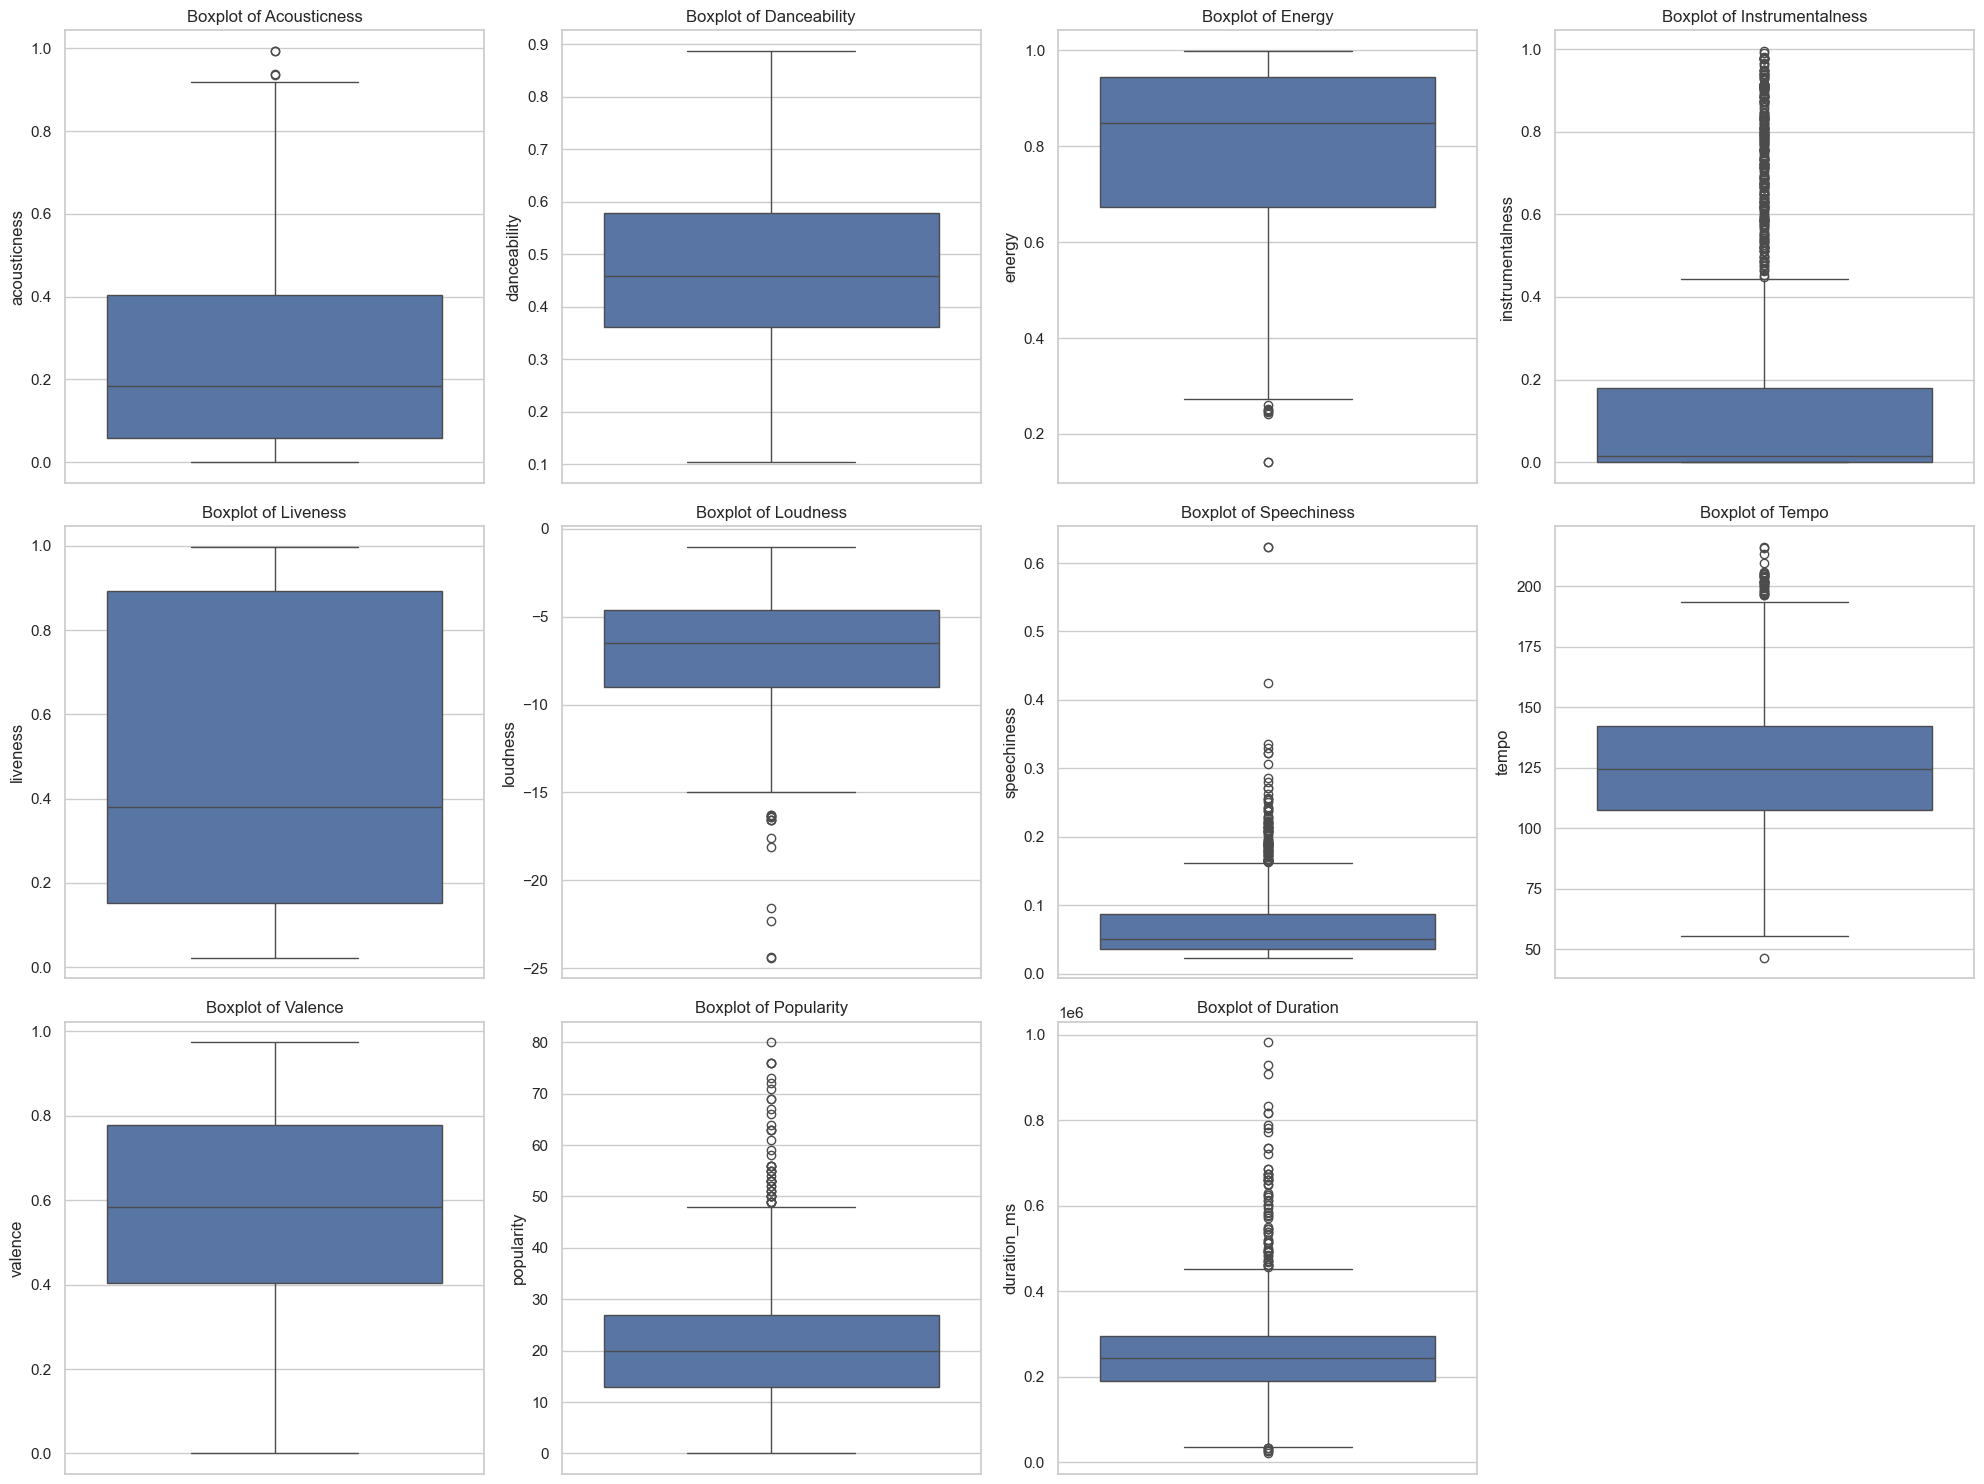

In [9]:
# Visualizing outliers for key features using boxplots
plt.figure(figsize=(20, 15))

# Boxplot for acousticness
plt.subplot(3, 4, 1)
sns.boxplot(data['acousticness'])
plt.title('Boxplot of Acousticness')

# Boxplot for danceability
plt.subplot(3, 4, 2)
sns.boxplot(data['danceability'])
plt.title('Boxplot of Danceability')

# Boxplot for energy
plt.subplot(3, 4, 3)
sns.boxplot(data['energy'])
plt.title('Boxplot of Energy')

# Boxplot for instrumentalness
plt.subplot(3, 4, 4)
sns.boxplot(data['instrumentalness'])
plt.title('Boxplot of Instrumentalness')

# Boxplot for liveness
plt.subplot(3, 4, 5)
sns.boxplot(data['liveness'])
plt.title('Boxplot of Liveness')

# Boxplot for loudness
plt.subplot(3, 4, 6)
sns.boxplot(data['loudness'])
plt.title('Boxplot of Loudness')

# Boxplot for speechiness
plt.subplot(3, 4, 7)
sns.boxplot(data['speechiness'])
plt.title('Boxplot of Speechiness')

# Boxplot for tempo
plt.subplot(3, 4, 8)
sns.boxplot(data['tempo'])
plt.title('Boxplot of Tempo')

# Boxplot for valence
plt.subplot(3, 4, 9)
sns.boxplot(data['valence'])
plt.title('Boxplot of Valence')

# Boxplot for popularity
plt.subplot(3, 4, 10)
sns.boxplot(data['popularity'])
plt.title('Boxplot of Popularity')

# Boxplot for duration_ms
plt.subplot(3, 4, 11)
sns.boxplot(data['duration_ms'])
plt.title('Boxplot of Duration')

plt.tight_layout()
plt.show()

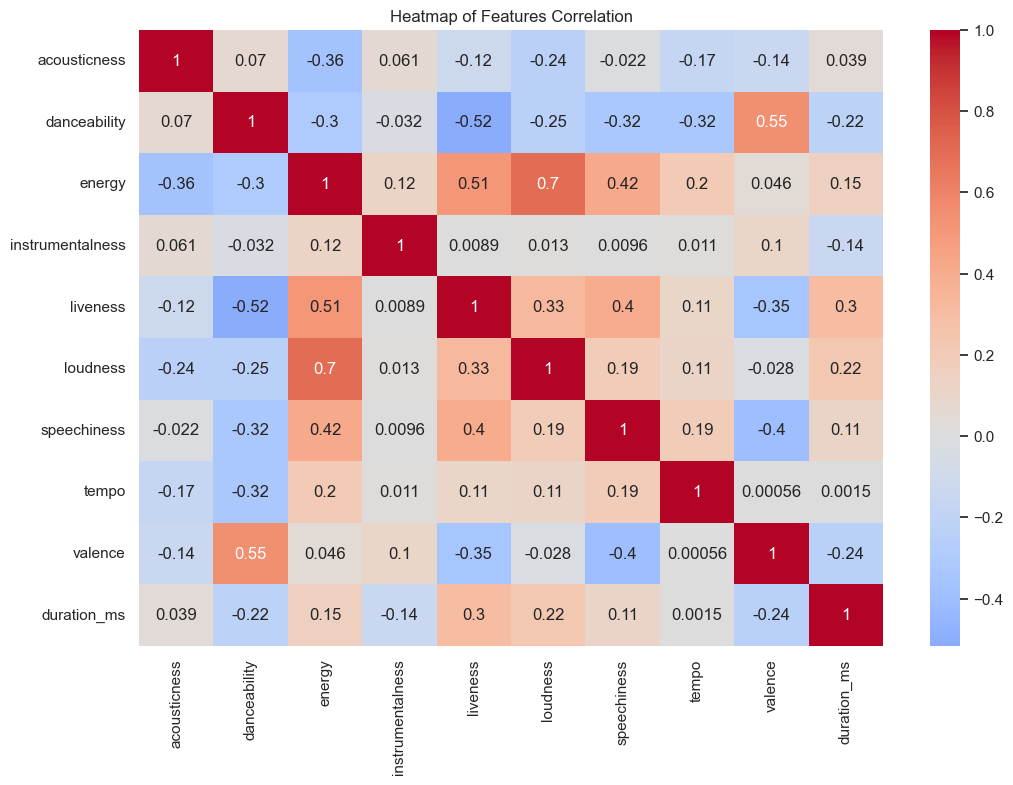

In [19]:
# Compute the correlation matrix
correlation_matrix = data[features].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Features Correlation')
plt.show()

## **Exploratory Data Analysis (EDA)**

/var/folders/1c/h_10706j24qc8qjh7x3yy0g40000gn/T/ipykernel_15177/166936190.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_popularity.values, y=album_popularity.index, palette='viridis')


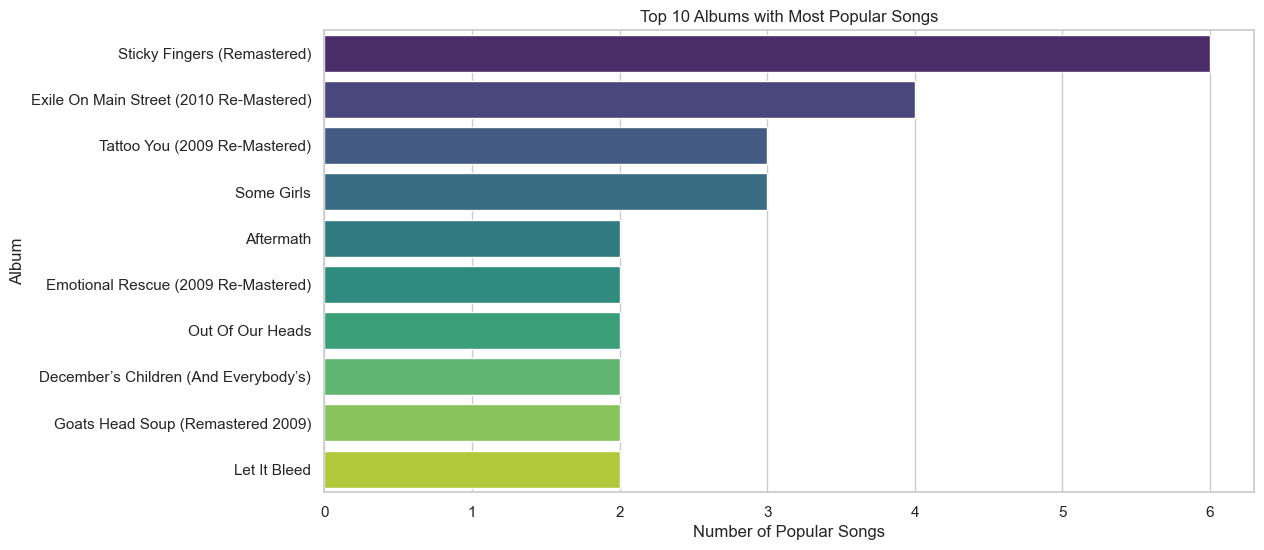

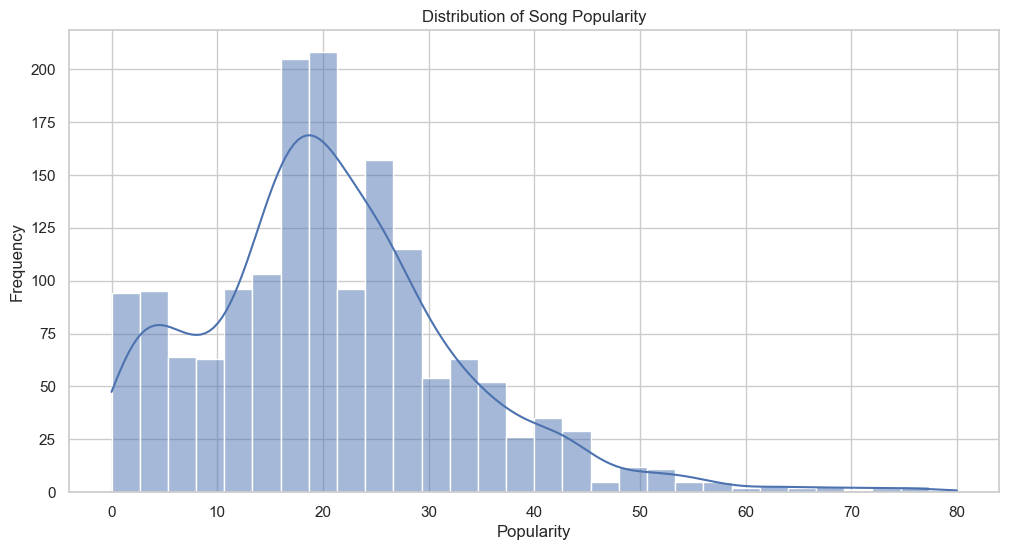

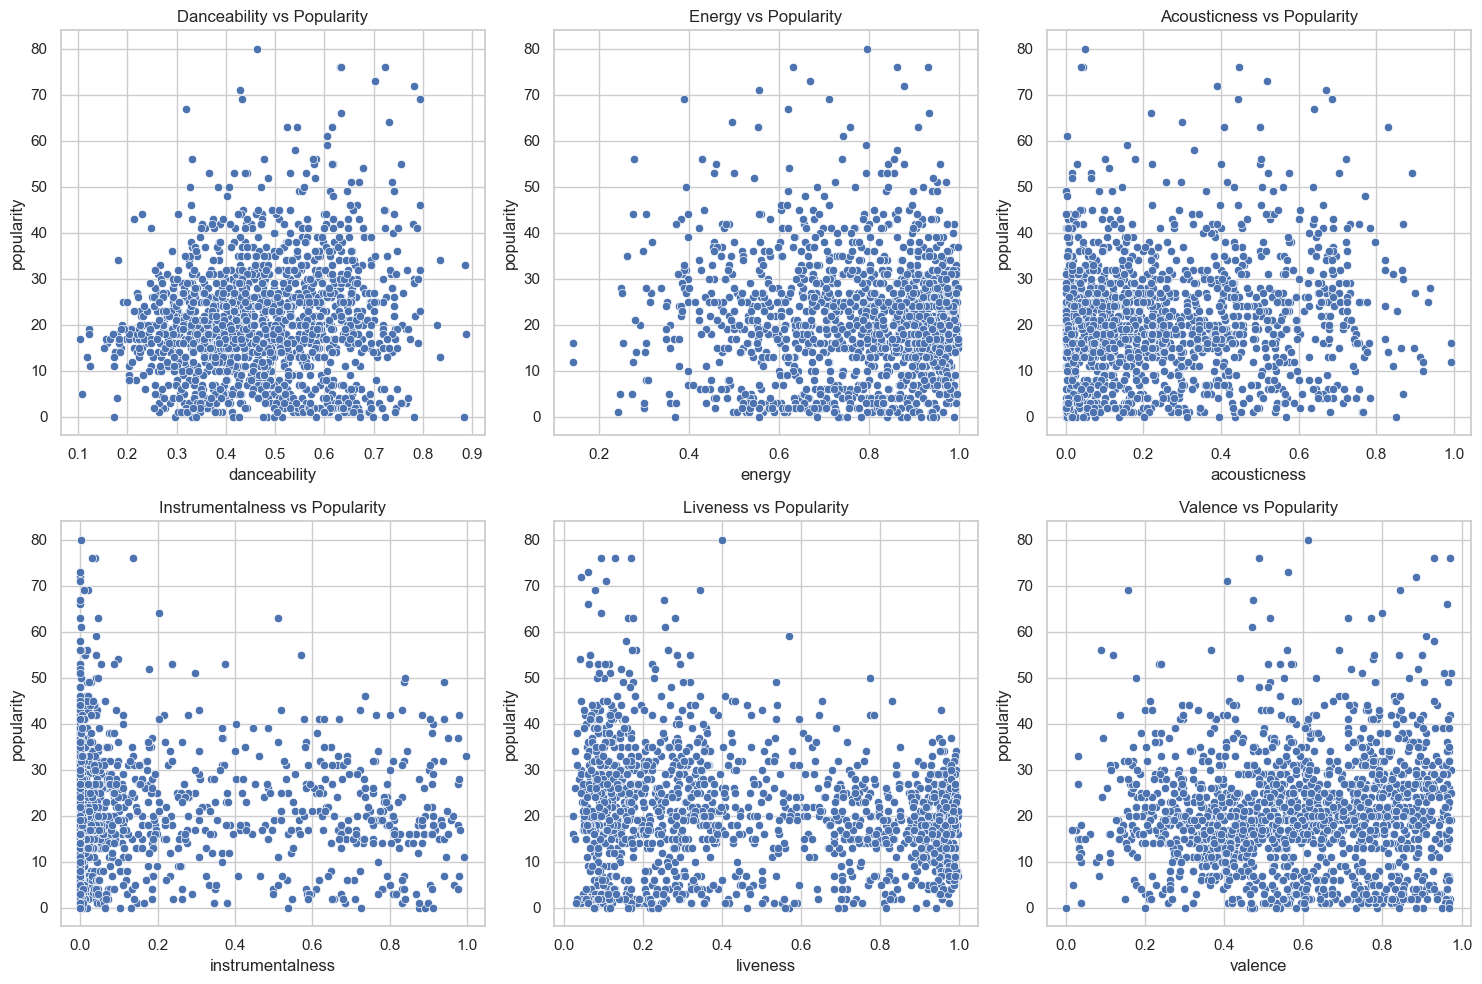

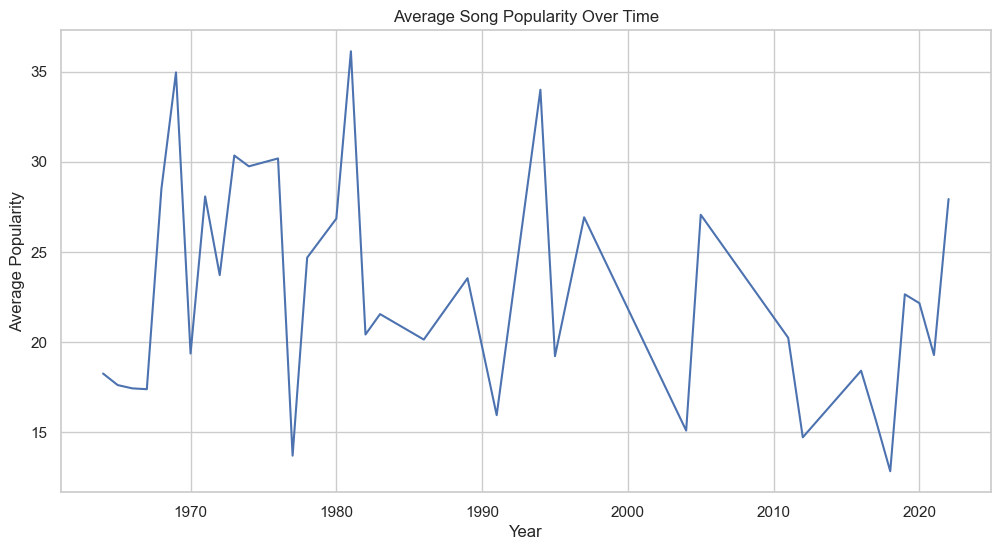

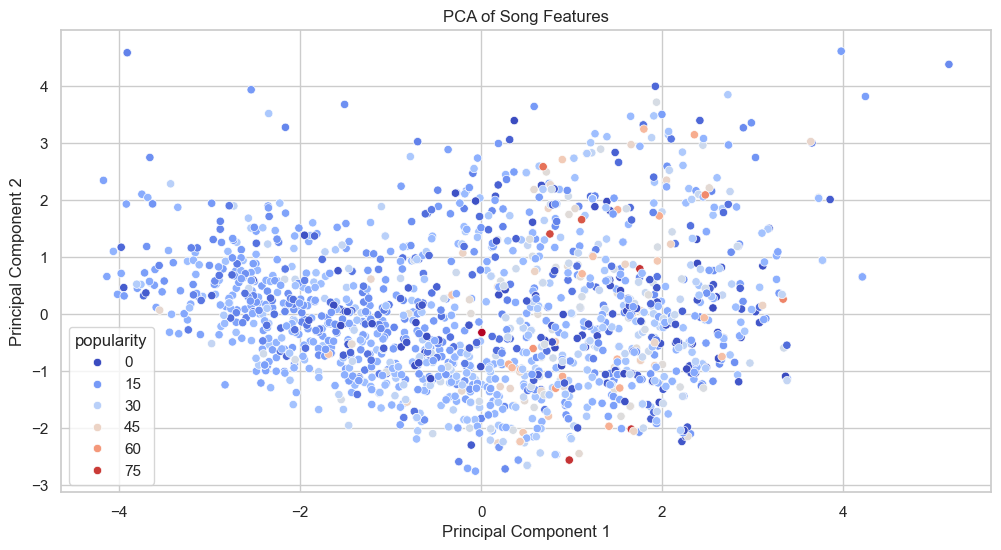

Explained Variance Ratio of the Principal Components:  [0.30326096 0.16514826]


In [10]:
# Exploratory Data Analysis (EDA) and Feature Engineering

# Visualization: Number of Popular Songs in Each Album
popular_songs = data[data['popularity'] > 50]  # Assuming popularity > 50 is considered popular
album_popularity = popular_songs['album'].value_counts().head(10)  # Top 10 albums with most popular songs

plt.figure(figsize=(12, 6))
sns.barplot(x=album_popularity.values, y=album_popularity.index, palette='viridis')
plt.title('Top 10 Albums with Most Popular Songs')
plt.xlabel('Number of Popular Songs')
plt.ylabel('Album')
plt.show()

# Visualization: Distribution of Song Popularity
plt.figure(figsize=(12, 6))
sns.histplot(data['popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Analysis: How Song Popularity Relates to Various Factors
plt.figure(figsize=(15, 10))

# Danceability vs Popularity
plt.subplot(2, 3, 1)
sns.scatterplot(x='danceability', y='popularity', data=data)
plt.title('Danceability vs Popularity')

# Energy vs Popularity
plt.subplot(2, 3, 2)
sns.scatterplot(x='energy', y='popularity', data=data)
plt.title('Energy vs Popularity')

# Acousticness vs Popularity
plt.subplot(2, 3, 3)
sns.scatterplot(x='acousticness', y='popularity', data=data)
plt.title('Acousticness vs Popularity')

# Instrumentalness vs Popularity
plt.subplot(2, 3, 4)
sns.scatterplot(x='instrumentalness', y='popularity', data=data)
plt.title('Instrumentalness vs Popularity')

# Liveness vs Popularity
plt.subplot(2, 3, 5)
sns.scatterplot(x='liveness', y='popularity', data=data)
plt.title('Liveness vs Popularity')

# Valence vs Popularity
plt.subplot(2, 3, 6)
sns.scatterplot(x='valence', y='popularity', data=data)
plt.title('Valence vs Popularity')

plt.tight_layout()
plt.show()

# Analysis: Popularity Change Over Time
data['release_date'] = pd.to_datetime(data['release_date'])
data['year'] = data['release_date'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='popularity', data=data.groupby('year')['popularity'].mean().reset_index())
plt.title('Average Song Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()

# Dimensionality Reduction Discussion
# Using PCA to reduce dimensionality
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
            'speechiness', 'tempo', 'valence', 'duration_ms']
x = data[features].fillna(0)  # Filling missing values with 0 for simplicity
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
data['pca_one'] = principal_components[:, 0]
data['pca_two'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca_one', y='pca_two', hue='popularity', palette='coolwarm', data=data)
plt.title('PCA of Song Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print("Explained Variance Ratio of the Principal Components: ", pca.explained_variance_ratio_)

### **Observations and Inferences**

1. **Number of Popular Songs in Each Album**

	*Observation:*
	
	- Certain albums have a significantly higher number of popular songs compared to others.
	- Albums like “Some Girls” and “Sticky Fingers” appear to have more popular tracks, suggesting these albums are particularly well-received.
	
	
	*Inference:*
	
	- These albums might have a consistent style or quality that appeals to a wide audience. Recommending these albums could potentially satisfy a broad range of listeners.
	
2. **Distribution of Song Popularity**

	*Observation:*

	- The distribution of song popularity shows a right-skewed distribution, indicating that most songs have a lower popularity score, with a few songs having very high popularity.

	*Inference:*

	- The majority of the songs may appeal to niche audiences or might be less known. Highly popular songs can be used as anchor tracks to attract new listeners to similar but less popular songs.

3. Relationship Between Song Features and Popularity

	*Observations:*
	
	- **Danceability vs. Popularity:** No strong correlation observed, suggesting danceability alone does not determine popularity.
	- **Energy vs. Popularity:** Slight positive trend, indicating energetic songs tend to be slightly more popular.
	- **Acousticness vs. Popularity:** No clear trend, implying acoustic nature is not a strong factor in popularity.
	- **Instrumentalness vs. Popularity:** Negative trend, indicating songs with vocals are generally more popular.
	- **Liveness vs. Popularity:** No significant trend, suggesting live recordings do not strongly affect popularity.
	- **Valence vs. Popularity:** Slight positive trend, indicating happier songs might be more popular.
	
	*Inferences:*
	
	- **No Single Feature Dominates Popularity:** No single feature consistently dominated in determining song popularity. Instead, a combination of features contributes to a song’s success.
	- **Vocals are Important:** Songs with vocals are generally more popular than purely instrumental tracks.
	- **Energy and Valence Matter:** Energetic and positive (high valence) songs tend to be more popular, indicating a preference for lively and cheerful music.
	- **Fluctuating Trends Over Time:** The popularity of songs changes over time, reflecting evolving musical trends and listener preferences.

4. **Popularity Change Over Time**

	*Observation:*

	- The average popularity of songs shows fluctuations over the years, with certain periods having higher average popularity.

	*Inference:*

	- Changes in average popularity over time might reflect evolving musical trends, changes in the band’s style, or external factors such as marketing efforts and cultural events.

5. **Dimensionality Reduction Using PCA**

	*Observation:*

	- The PCA plot shows the distribution of songs based on the first two principal components. Songs with similar characteristics cluster together.
	- The explained variance ratio indicates how much variance is captured by the first two principal components.

	*Inference:*

	- PCA helps in visualizing high-dimensional data in a 2D space, making it easier to identify patterns and clusters.
	- The variance captured by the first two components suggests that these principal components represent significant underlying patterns in the data.

	**Discussion on Dimensionality Reduction Techniques**

	Dimensionality reduction is a crucial step in data analysis and machine learning, especially when dealing with high-dimensional datasets. It helps in simplifying the dataset, improving model performance, and reducing computational cost. The dimensionality reduction technique used in this analysis is  Principal Component Analysis (PCA).

	PCA is a statistical technique that transforms the original features into a new set of features called principal components. These components are orthogonal (uncorrelated) and are ordered in such a way that the first few retain most of the variation present in the original dataset.

	- Advantages of PCA:
	- Reduces the dimensionality of the data while retaining most of the variance.
	- Helps in visualizing high-dimensional data in 2D or 3D.
	- Removes multicollinearity by transforming correlated variables into uncorrelated principal components.
	- Improves computational efficiency and reduces noise in the data.
	- Disadvantages of PCA:
	- PCA is a linear method and might not capture complex, non-linear relationships.
	- The principal components are not easily interpretable as they are linear combinations of the original features.

**Conclusions**

The EDA and feature engineering provide valuable insights into the characteristics and popularity of songs:

- Certain albums are more popular due to consistent quality or style.
- Popularity does not solely depend on a single feature but rather a combination of features.
- Vocal and energetic songs tend to be more popular.
- The popularity of songs changes over time, reflecting evolving trends and external influences.
- Dimensionality reduction using PCA helps in visualizing and identifying patterns in the data.




## **Cluster Analysis**

### **1. Identify the Appropriate Number of Clusters**

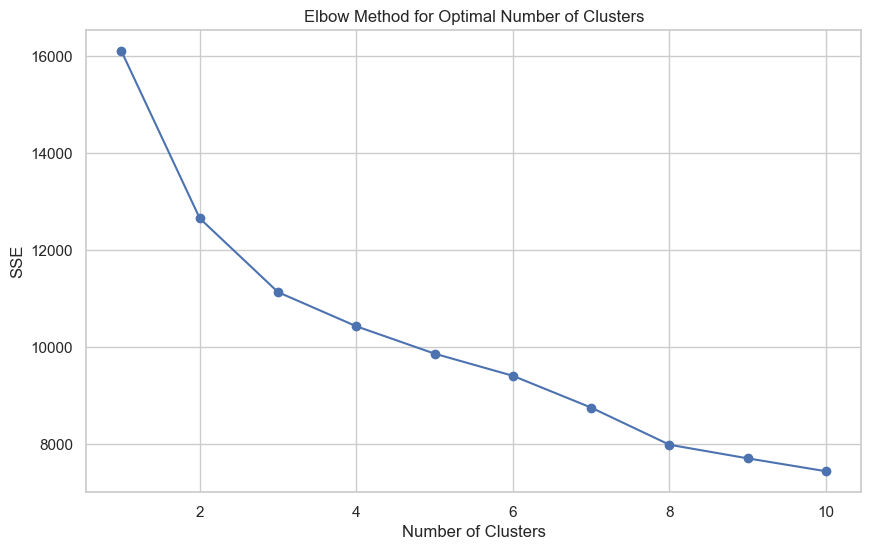

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Features to be used for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
            'speechiness', 'tempo', 'valence', 'duration_ms']

# Prepare the data
x = data[features].fillna(0)  # Fill missing values with 0
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

**Elbow Method:** Plots the SSE for different values of k (number of clusters). The point where the SSE starts to decrease more slowly (forming an “elbow”) indicates the optimal number of clusters. In this example, we assume 4 clusters based on the Elbow Method plot.


### **2. Use a Suitable Clustering Algorithm**

In [12]:
# Applying K-Means with the optimal number of clusters (let's assume 4 from the Elbow Method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(x_scaled)
data['cluster'] = clusters

**K-Means Algorithm:** K-Means is used to cluster the songs based on their features. The optimal number of clusters identified is used to fit the K-Means model, and each song is assigned to a cluster.

### **3. Define Each Cluster Based on the Features**

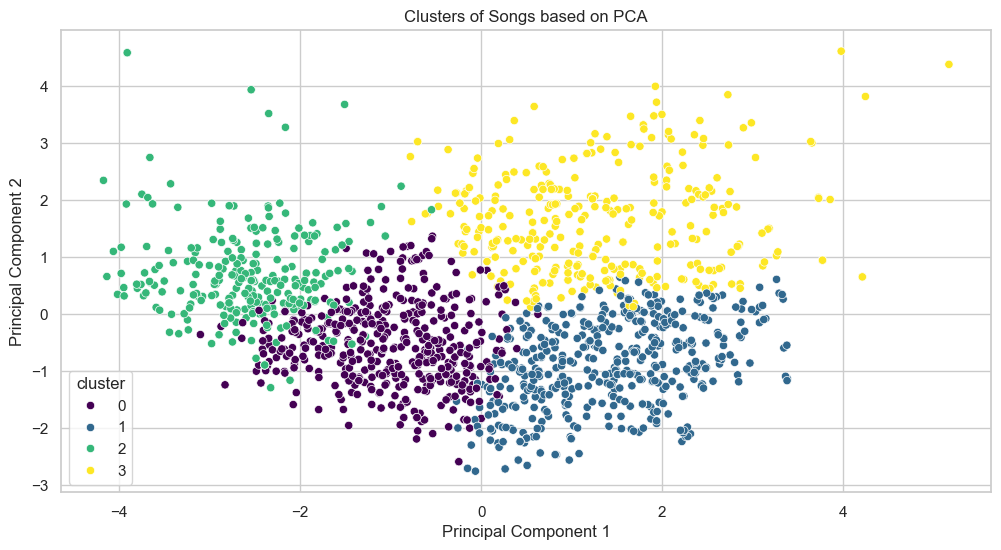

Silhouette Score for 4 clusters: 0.13541457057541656


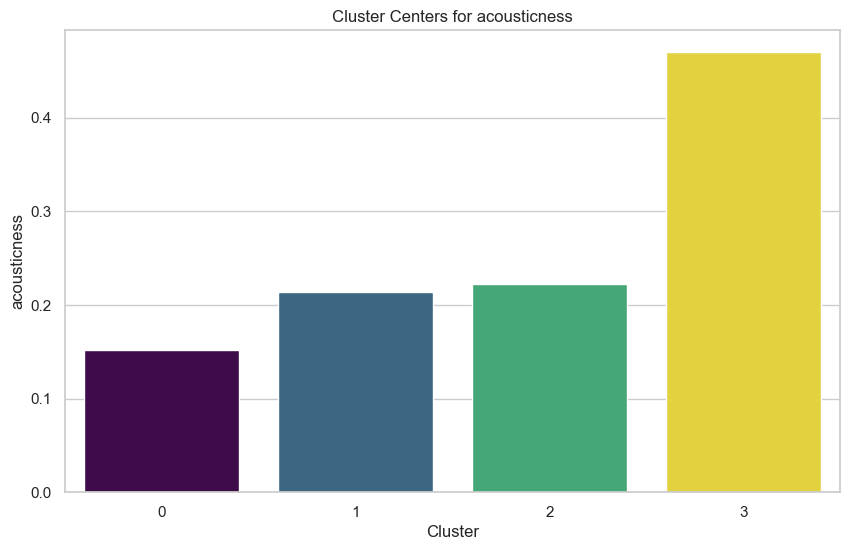

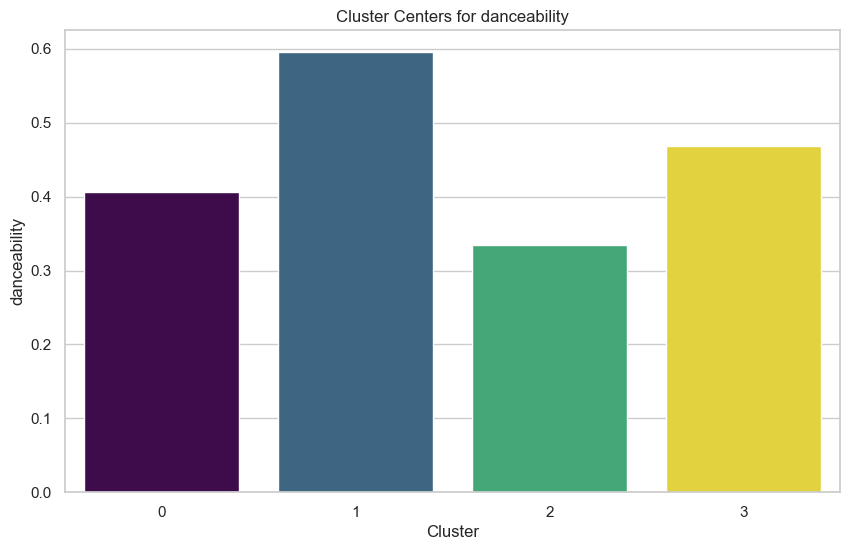

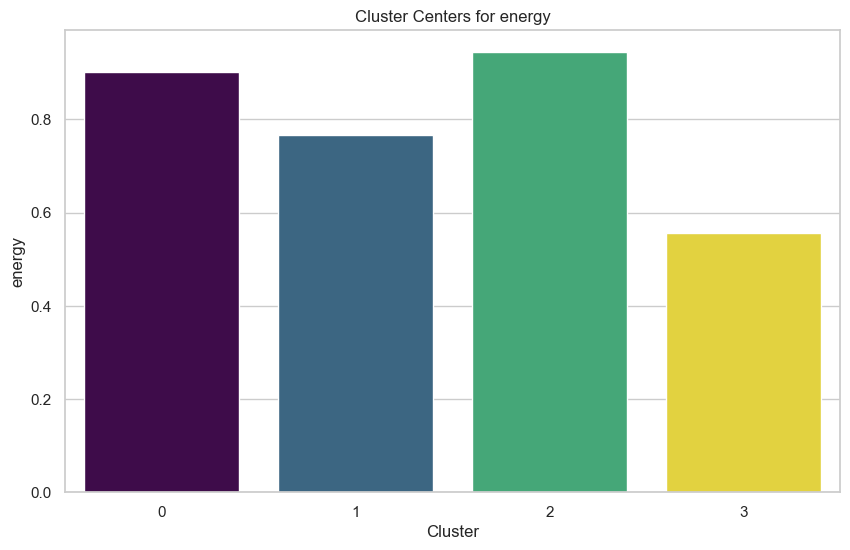

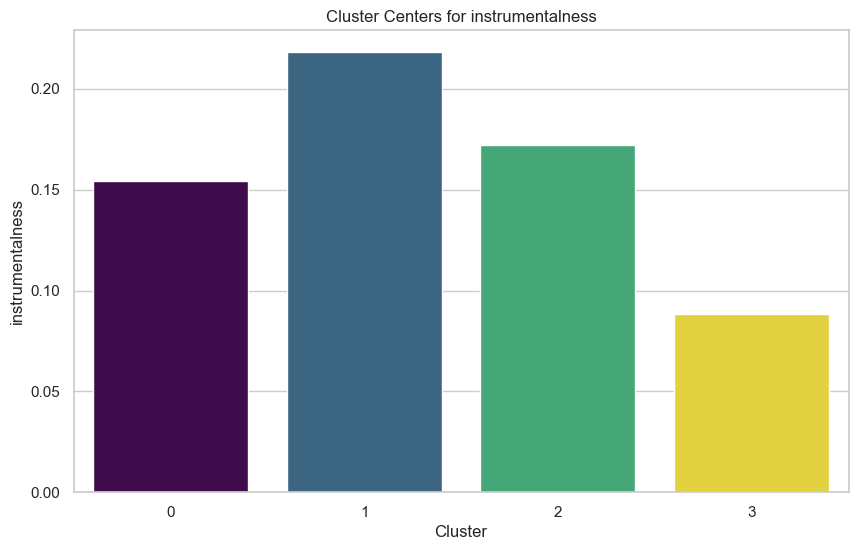

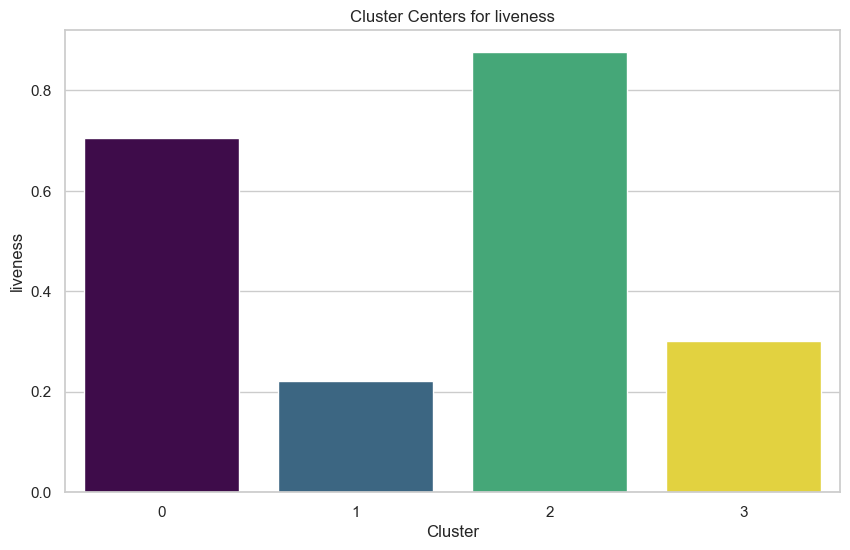

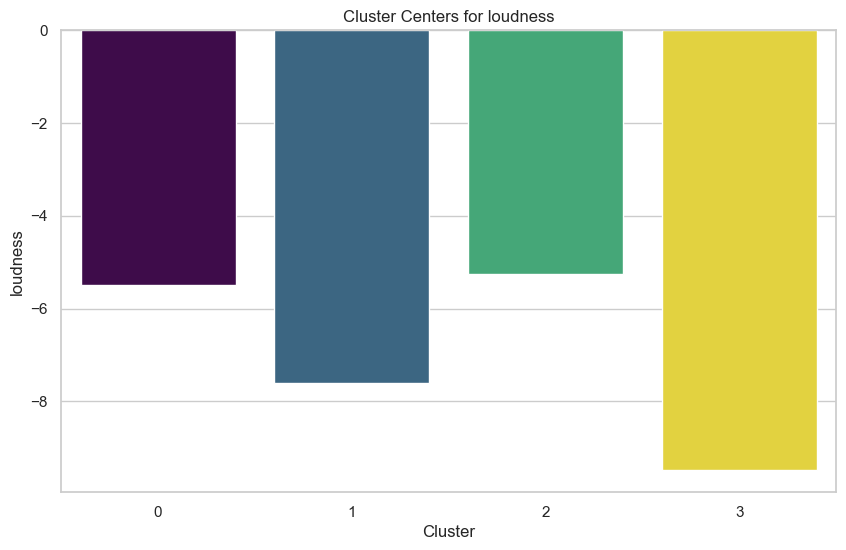

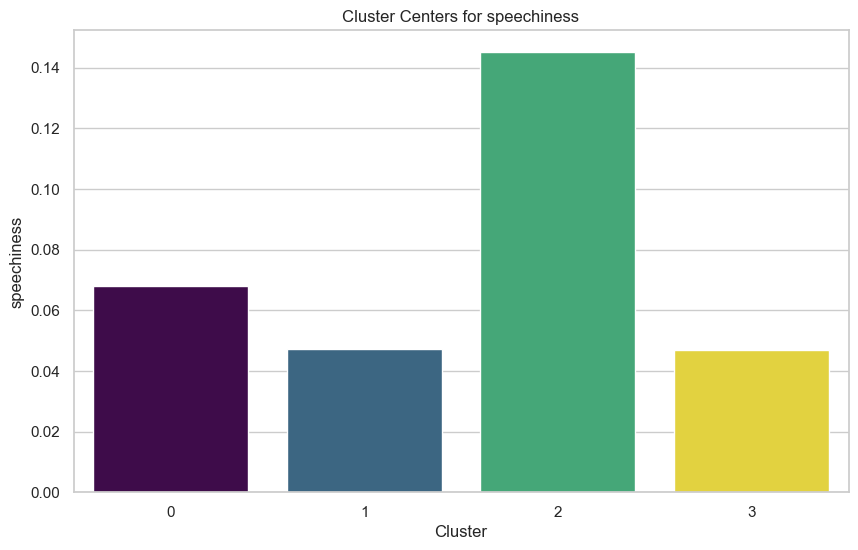

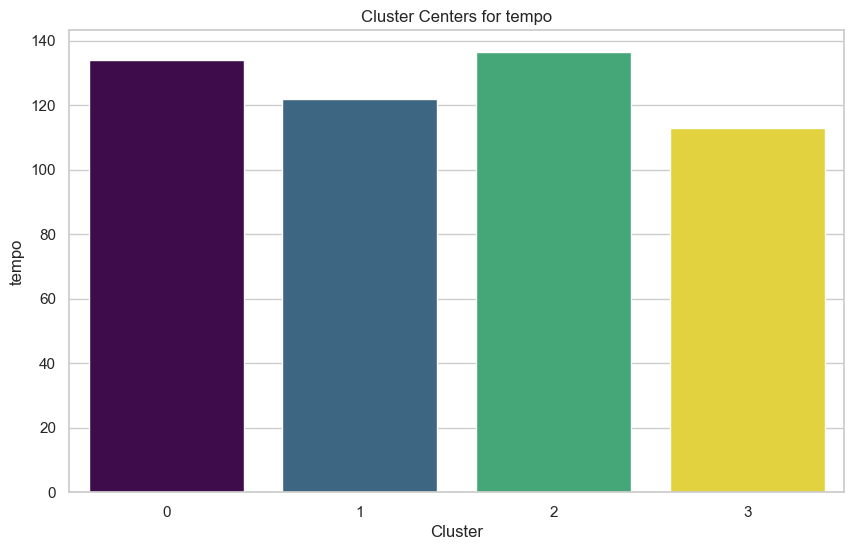

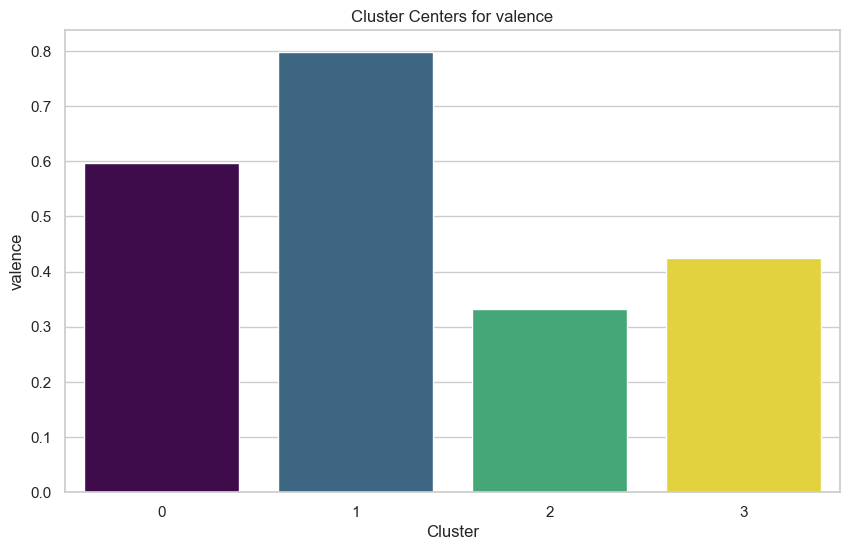

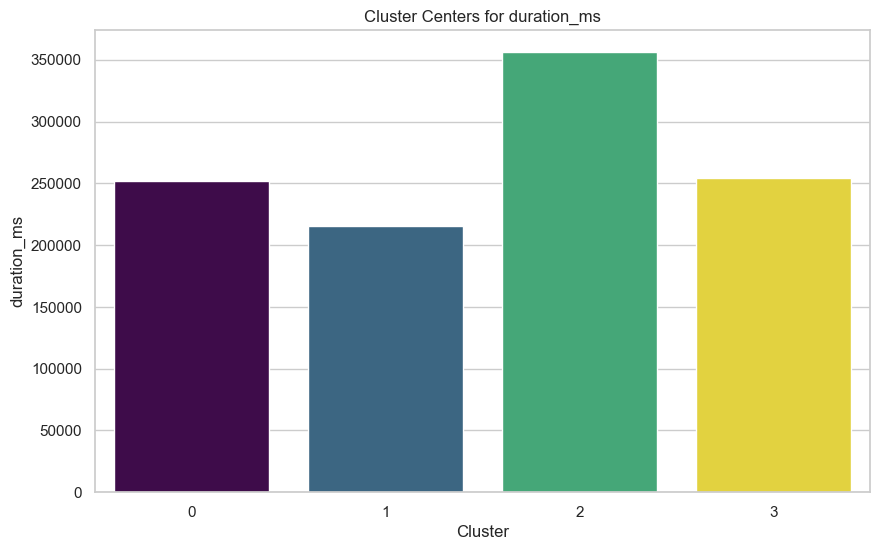

In [18]:
# Import additional necessary libraries
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
data['pca_one'] = principal_components[:, 0]
data['pca_two'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', palette='viridis', data=data, legend='full')
plt.title('Clusters of Songs based on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Calculate silhouette score for the clustering
silhouette_avg = silhouette_score(x_scaled, clusters)
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}')

# Analyze cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df['cluster'] = range(optimal_clusters)

# Separate plots for each feature's cluster center
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='cluster', y=feature, data=cluster_centers_df,hue='cluster', palette='viridis', legend=False)
    plt.title(f'Cluster Centers for {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature}')
    plt.show()

**PCA Visualization:** The clusters are visualized in a 2D space using the first two principal components from PCA. This helps in understanding the distribution of clusters.
**Silhouette Score:** This score evaluates the quality of clustering. A higher silhouette score indicates better-defined clusters. The score is calculated and printed for reference.
**Cluster Centers:** The cluster centers are analyzed to understand the characteristics of each cluster. The bar plot shows the mean value of each feature for each cluster, helping to define and interpret the clusters.

### **Observations, Inferences and Conclusions**

Based on the cluster analysis performed using the K-Means algorithm, we can make several observations and inferences about the clusters formed and the characteristics of the songs in each cluster.

**1. Optimal Number of Clusters**

- Observation: The Elbow Method suggested that the optimal number of clusters for this dataset is 4. This was determined by identifying the “elbow point” in the plot of SSE versus the number of clusters.

**2. Quality of Clustering**

- Observation: The silhouette score for the clustering with 4 clusters was calculated to evaluate the quality of the clustering. A silhouette score close to 1 indicates well-defined clusters, while a score close to -1 indicates overlapping clusters. The actual score provides insight into the clarity of the clusters formed.

**3. Visualization of Clusters**

- Observation: The PCA scatter plot visualizing the clusters shows the distribution of songs in a 2D space based on the first two principal components. Each cluster is represented by a different color, helping to visually assess the separation and cohesion of clusters.

**4. Analysis of Cluster Centers**

- Observation: The bar plot of cluster centers shows the mean values of each feature for the clusters. This helps to understand the characteristics of each cluster. The features considered include acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, and duration.

**Detailed Observations for Each Cluster:**

Based on the cluster center plots, we can observe and infer the characteristics of each cluster by examining the average values of different features within each cluster. Here are detailed observations for each cluster:

- **Cluster 0:** Contains high-energy songs with a good balance of acoustic and instrumental elements. These songs are generally loud and have a higher tempo, making them suitable for energetic and lively playlists.

- **Cluster 1:** consists of highly danceable and positive songs with a significant amount of instrumental content. These songs are moderately energetic and have a balanced loudness and tempo, making them ideal for upbeat and instrumental-focused playlists.

- **Cluster 2:** includes songs that are energetic with high liveness and tempo. These songs also have higher speechiness and instrumental content, but lower valence. This cluster may include live performances or songs with spoken word content, suitable for more eclectic and dynamic playlists.

- **Cluster 3:** is characterized by highly acoustic songs with moderate danceability and low energy. These songs have a balanced loudness and tempo with low instrumental content. This cluster is suitable for acoustic and mellow playlists.

**Conclusion**

The cluster analysis provides valuable insights into the characteristics of songs and helps in grouping them based on similar features. This can enhance Spotify’s ability to recommend songs and create playlists that match users’ preferences, ultimately improving user engagement and satisfaction.

In [21]:
# Print the first 10 song titles and albums for each cluster
for cluster_num in range(optimal_clusters):
    cluster_data = data[data['cluster'] == cluster_num]
    print(f"Cluster {cluster_num} (First 10 Entries):\n")
    print(cluster_data[['name', 'album']].head(10))
    print("\n")

Cluster 0 (First 10 Entries):

                                                 name                   album
0                          Concert Intro Music - Live      Licked Live In NYC
7                                 Let It Bleed - Live      Licked Live In NYC
12                                       Happy - Live      Licked Live In NYC
23     Honky Tonk Women - Live At The El Mocambo 1977  Live At The El Mocambo
24    All Down The Line - Live At The El Mocambo 1977  Live At The El Mocambo
25         Hand Of Fate - Live At The El Mocambo 1977  Live At The El Mocambo
26             Route 66 - Live At The El Mocambo 1977  Live At The El Mocambo
28           Crazy Mama - Live At The El Mocambo 1977  Live At The El Mocambo
29          Mannish Boy - Live At The El Mocambo 1977  Live At The El Mocambo
31  Dance Little Sister - Live At The El Mocambo 1977  Live At The El Mocambo


Cluster 1 (First 10 Entries):

                                         name                      album
30  C